In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

O dataset utilizado é da Brail.io e compilam boletins epidemiológicos das 27 Secretarias Estaduais de Saúde com uma base de dados com a série histórica de casos e óbitos confirmados por município.


Os dados são referentes do perído de 6 de Junho de 2020 até a ultima atualização em 27 de Março de 2022.
 


In [18]:
!wget https://data.brasil.io/dataset/covid19/caso_full.csv.gz
covid = pd.read_csv('caso_full.csv.gz')
covid.rename(columns={'last_available_deaths':'Deaths', 'last_available_date':'Date','estimated_population':'populacao'}, inplace=True)

df = pd.DataFrame(covid)
df

--2022-07-18 14:14:54--  https://data.brasil.io/dataset/covid19/caso_full.csv.gz
Resolving data.brasil.io (data.brasil.io)... 172.67.71.45, 104.26.8.175, 104.26.9.175, ...
Connecting to data.brasil.io (data.brasil.io)|172.67.71.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92436661 (88M) [application/gzip]
Saving to: ‘caso_full.csv.gz.2’

caso_full.csv.gz.2  100%[===================>]  88.15M  11.2MB/s    in 7.9s    

2022-07-18 14:15:02 (11.2 MB/s) - ‘caso_full.csv.gz.2’ saved [92436661/92436661]



,city,city_ibge_code,date,epidemiological_week,populacao,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,Date,last_available_death_rate,Deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853643,Tupirama,1721257.0,2022-03-27,202213,1922.0,1891.0,False,True,223,11602.49740,2021-12-08,0.0090,2,674,city,TO,0,0
3853644,Tupiratins,1721307.0,2022-03-27,202213,2729.0,2671.0,False,True,199,7292.04837,2021-12-08,0.0151,3,674,city,TO,0,0
3853645,Wanderlândia,1722081.0,2022-03-27,202213,11734.0,11683.0,False,True,1433,12212.37430,2021-12-08,0.0147,21,699,city,TO,0,0
3853646,Xambioá,1722107.0,2022-03-27,202213,11520.0,11540.0,False,True,2458,21336.80556,2021-12-08,0.0146,36,688,city,TO,0,0


Os dados são atualizados por município,porém quero visualizar por estado, então filtramos os dados por estado gerando um novo dataset:

In [19]:
estados= df.loc[df.place_type == 'state', :]
estados.head()

,city,city_ibge_code,date,epidemiological_week,populacao,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,Date,last_available_death_rate,Deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
5,NaN,12.0,2020-03-19,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0
7,NaN,12.0,2020-03-20,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0
9,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0


In [20]:
len(estados.state.unique())

27

In [21]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20119 entries, 1 to 3853647
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   city                                           0 non-null      object 
 1   city_ibge_code                                 20119 non-null  float64
 2   date                                           20119 non-null  object 
 3   epidemiological_week                           20119 non-null  int64  
 4   populacao                                      20119 non-null  float64
 5   estimated_population_2019                      20119 non-null  float64
 6   is_last                                        20119 non-null  bool   
 7   is_repeated                                    20119 non-null  bool   
 8   last_available_confirmed                       20119 non-null  int64  
 9   last_available_confirmed_per_100k_inhabitants  2

Selecionando as colunas que vão ser usadas para a analise 

In [22]:
data= estados[[ 'state', 'Deaths','is_last','place_type', 'is_repeated','last_available_death_rate','populacao']]
data

,state,Deaths,is_last,place_type,is_repeated,last_available_death_rate,populacao
1,AC,0,False,state,False,0.0000,894470.0
3,AC,0,False,state,False,0.0000,894470.0
5,AC,0,False,state,False,0.0000,894470.0
7,AC,0,False,state,False,0.0000,894470.0
9,AC,0,False,state,False,0.0000,894470.0
...,...,...,...,...,...,...,...
3853087,TO,4142,False,state,False,0.0137,1590248.0
3853227,TO,4142,False,state,False,0.0137,1590248.0
3853367,TO,4142,True,state,False,0.0137,1590248.0
3853507,TO,4142,False,state,True,0.0137,1590248.0


Ordenando o conjunto de dados e selecionando as últimas atualizações sem repetição.

In [23]:
dados=data.loc[data.is_last== True, :]
dados = dados.reset_index(drop=True)

dados

,state,Deaths,is_last,place_type,is_repeated,last_available_death_rate,populacao
0,AC,1992,True,state,False,0.0161,894470.0
1,AL,6869,True,state,False,0.0232,3351543.0
2,AM,14151,True,state,False,0.0244,4207714.0
3,AP,2122,True,state,False,0.0132,861773.0
4,BA,29658,True,state,False,0.0194,14930634.0
5,CE,26708,True,state,False,0.0215,9187103.0
6,DF,11573,True,state,False,0.0167,3055149.0
7,ES,14323,True,state,False,0.0138,4064052.0
8,GO,26212,True,state,False,0.0206,7113540.0
9,MA,10869,True,state,False,0.0256,7114598.0


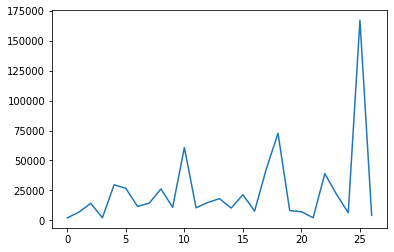

In [24]:
dados.Deaths.plot()
#dados2.Deaths.mean()

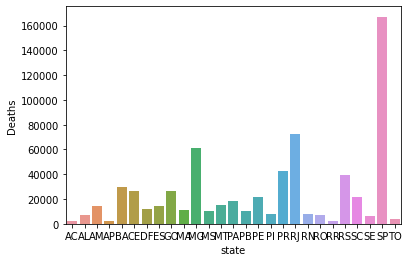

In [25]:
sns.barplot(x="state", y="Deaths", data= dados)

Essencialmente, nessa primeira parte, estamos focados em apresentar a média de mortalidade por região.

OBS:Os dados levam em consideração a  população estimada para o município/estado em 2020, segundo o IBGE. 


In [26]:
media_total= dados.Deaths.mean()
media_total #media de  todas as mortes 

24413.296296296296

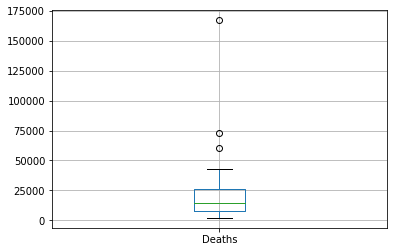

In [27]:
dados.boxplot(column=['Deaths'])
plt.show()

A taxa de mortalidade é obtida pelo calculo do número de óbitos por milhao divido pelo número de habitantes.

# **REGIAO** **NORDESTE**

In [ ]:
from numpy.ma.core import mean
nordeste = ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"]
df_nordeste = dados.query(f"place_type == 'state' and state in {nordeste}")


df_nordeste["Morte"] = (df_nordeste["Deaths"] *1000000 / df_nordeste["populacao"] )
df_nordeste


**MEDIA DOS ESTADOS DA REGIAO** **NORDESTE**

In [29]:
#MEDIA
soma= df_nordeste['Deaths'].sum()
pop= df_nordeste['populacao'].sum()

nordeste_mean = (soma* 1000000)/pop
nordeste_mean


2227.619804935814

In [30]:
fig = px.bar(df_nordeste, x='state', y='Morte', color='state',barmode='group', title="mortalidade da regiao nordeste")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.show()

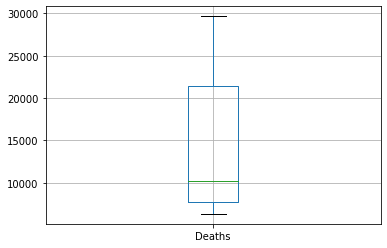

In [31]:
df_nordeste.boxplot(column=['Deaths'])
plt.show()

# **REGIAO** **SUDESTE**

In [ ]:
sudeste = ["MG", "SP", "ES", "RJ"]
df_sudeste = dados.query(f"place_type == 'state' and state in {sudeste}")
df_sudeste["Morte"] = df_sudeste["Deaths"] * 1000000/ df_sudeste["populacao"] 
df_sudeste


**MEDIA** **DOS** **ESTADOS** **DA** **REGIAO** **SUDESTE**

In [33]:
soma= df_sudeste['Deaths'].sum()
pop= df_sudeste['populacao'].sum()

sudeste_mean = soma*1000000/pop
sudeste_mean

3537.659539856541

In [48]:
fig = px.bar(df_sudeste, x='state', y='Morte', color='state',barmode='group', title="mortalidade da regiao sudeste")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.show()

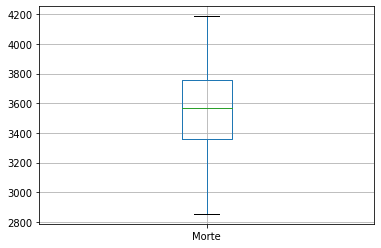

In [35]:
df_sudeste.boxplot(column='Morte')
plt.show()

# **REGIAO** **SUL**

In [ ]:
sul = ["RS", "PR", "SC"]
df_sul = dados.query(f"place_type == 'state' and state in {sul}")
df_sul["Morte"]= df_sul["Deaths"]*1000000 / df_sul["populacao"] 
df_sul

**MEDIA** **DOS** **ESTADOS** **DA** **REGIAO** **SUL**

In [37]:
soma= df_sul['Deaths'].sum()
pop= df_sul['populacao'].sum()

sul_mean = soma*1000000/pop
sul_mean

3428.9851573156943

In [49]:
fig = px.bar(df_sul, x='state', y='Morte', color='state',barmode='group', title=" mortalidade da regiao sul")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.show()

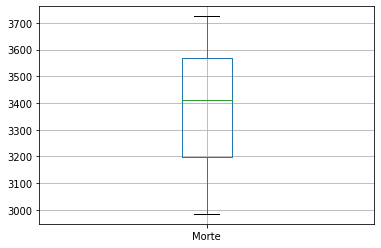

In [39]:

df_sul.boxplot(column='Morte')
plt.show()

# **REGIAO** **NORTE**

In [ ]:
norte = ["TO", "RO", "AC", "PA","AM","AP","RR"]
df_norte = dados.query(f"place_type == 'state' and state in {norte}")
df_norte["Morte"]= df_norte["Deaths"]*1000000 / df_norte["populacao"] 
df_norte

**MEDIA** **DOS** **ESTADOS** **DA** **REGIAO** **NORTE**

In [41]:
soma= df_norte['Deaths'].sum()
pop= df_norte['populacao'].sum()

norte_mean = soma*1000000/pop
norte_mean

2667.117809199591

In [50]:
fig = px.bar(df_norte, x='state', y='Morte', color='state',barmode='group', title="mortalidade da regiao norte")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.show()

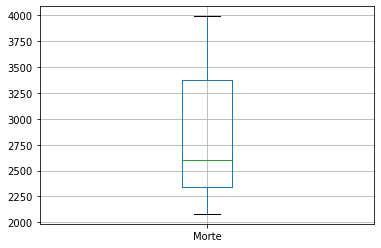

In [43]:
df_norte.boxplot(column='Morte')
plt.show()

# **REGIAO** **CENTRO**-**OESTE**

In [ ]:
centro_oeste = ["DF", "GO", "MT", "MS"]
df_centro_oeste = dados.query(f"place_type == 'state' and state in {centro_oeste}")
df_centro_oeste["Morte"]= df_centro_oeste["Deaths"]*1000000 / df_centro_oeste["populacao"] 
df_centro_oeste

**MEDIA** **DOS** **ESTADOS** **DA** **REGIAO** **CENTRO**-**OESTE**

In [45]:
soma= df_centro_oeste['Deaths'].sum()
pop= df_centro_oeste['populacao'].sum()

centro_oeste_mean = soma*1000000/pop
centro_oeste_mean

3824.7601246777886

In [51]:
fig = px.bar(df_centro_oeste, x='state', y='Morte', color='state',barmode='group', title="mortalidade da regiao Centro-Oeste")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(type='category')
fig.show()

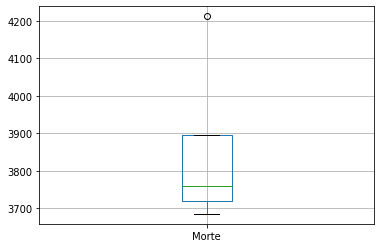

In [47]:
df_centro_oeste.boxplot(column='Morte')
plt.show()